In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Fire_Incident_Dispatch_Data.csv")

In [3]:
data.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,2785,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,...,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y,397,357,1,1,0
1,5.001331e+14,01/01/2005 12:00:03 AM,BRONX,3307,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,...,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y,260,250,1,0,0
2,5.001036e+14,01/01/2005 12:01:02 AM,BROOKLYN,363,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,...,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y,146,139,1,0,0
3,5.001752e+14,01/01/2005 12:01:42 AM,QUEENS,7515,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,114.0,22.0,401.0,...,01/01/2005 12:02:51 AM,01/01/2005 12:07:09 AM,01/01/2005 12:08:27 AM,N,Y,327,275,3,2,1
4,5.001716e+14,01/01/2005 12:01:45 AM,QUEENS,7162,JACKSON & 42 RD,QUEENS,11101.0,108.0,26.0,402.0,...,01/01/2005 12:04:12 AM,01/01/2005 12:08:16 AM,01/01/2005 12:24:37 AM,N,Y,391,279,1,1,1


## To do 

- Histogram - exploiring the data
    - INCIDENT_CLASSIFICATION_GROUP - types wise vs. months weeks and years ? 
    - INCIDENT_BOROUGH - location wise vs. months weeks and years ? 
    - *RESPONSE* vs. months weeks and years ? 

## Type of data

In [4]:
data.dtypes

STARFIRE_INCIDENT_ID              float64
INCIDENT_DATETIME                  object
ALARM_BOX_BOROUGH                  object
ALARM_BOX_NUMBER                    int64
ALARM_BOX_LOCATION                 object
INCIDENT_BOROUGH                   object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
COMMUNITYSCHOOLDISTRICT           float64
CONGRESSIONALDISTRICT             float64
ALARM_SOURCE_DESCRIPTION_TX        object
ALARM_LEVEL_INDEX_DESCRIPTION      object
HIGHEST_ALARM_LEVEL                object
INCIDENT_CLASSIFICATION            object
INCIDENT_CLASSIFICATION_GROUP      object
DISPATCH_RESPONSE_SECONDS_QY        int64
FIRST_ASSIGNMENT_DATETIME          object
FIRST_ACTIVATION_DATETIME          object
FIRST_ON_SCENE_DATETIME            object
INCIDENT_CLOSE_DATETIME            object
VALID_DISPATCH_RSPNS_TIME_INDC     object
VALID_INCIDENT_RSPNS_TIME_INDC    

In [5]:
incident_categories = set(data['INCIDENT_CLASSIFICATION_GROUP'])
incident_categories

{'Medical Emergencies',
 'Medical MFAs',
 'NonMedical Emergencies',
 'NonMedical MFAs',
 'NonStructural Fires',
 'Structural Fires'}

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Medical Emergencies'),
  Text(1, 0, 'NonMedical Emergencies'),
  Text(2, 0, 'Structural Fires'),
  Text(3, 0, 'NonMedical MFAs'),
  Text(4, 0, 'NonStructural Fires'),
  Text(5, 0, 'Medical MFAs')])

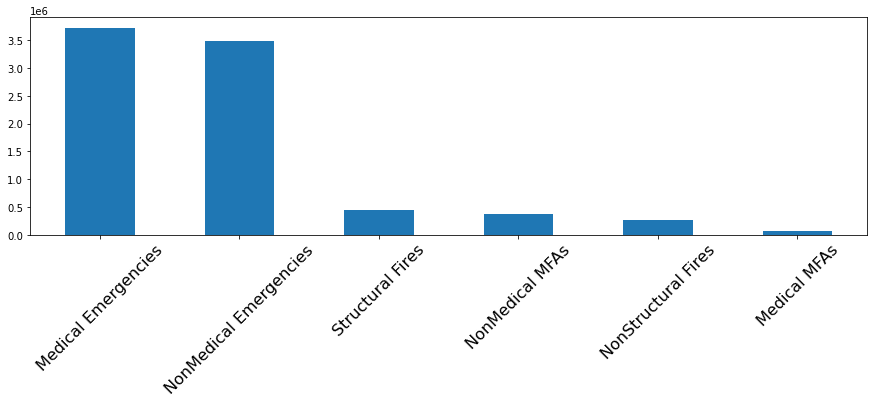

In [6]:
# occurance of different types of categories:
# data['INCIDENT_CLASSIFICATION_GROUP'].value_counts()

# histogram of different occurance 
fig=plt.figure(figsize=(15,4))
data['INCIDENT_CLASSIFICATION_GROUP'].value_counts().plot(kind='bar')
plt.xticks(rotation=45,fontsize=16)

##### Figure text
We can see that the medical emergencies and non medical emergencies are the most occuring instance within this data set 

## Data processing and transforming Datetime 


In [7]:
data['Month_Incident']=pd.DatetimeIndex(data['INCIDENT_DATETIME']).month

In [8]:
data['Year_Incident']=pd.DatetimeIndex(data['INCIDENT_DATETIME']).year

In [9]:
data['day_Incident']=pd.DatetimeIndex(data['INCIDENT_DATETIME']).day

In [10]:
data['DayOfWeek_Incident'] = pd.DatetimeIndex(data['INCIDENT_DATETIME']).dayofweek


In [11]:
data['Hour_Incident'] = pd.DatetimeIndex(data['INCIDENT_DATETIME']).hour

In [12]:
data.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,Month_Incident,Year_Incident,day_Incident,DayOfWeek_Incident,Hour_Incident
0,5.001279e+14,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,2785,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,...,397,357,1,1,0,1,2005,1,5,0
1,5.001331e+14,01/01/2005 12:00:03 AM,BRONX,3307,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,...,260,250,1,0,0,1,2005,1,5,0
2,5.001036e+14,01/01/2005 12:01:02 AM,BROOKLYN,363,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,...,146,139,1,0,0,1,2005,1,5,0
3,5.001752e+14,01/01/2005 12:01:42 AM,QUEENS,7515,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,114.0,22.0,401.0,...,327,275,3,2,1,1,2005,1,5,0
4,5.001716e+14,01/01/2005 12:01:45 AM,QUEENS,7162,JACKSON & 42 RD,QUEENS,11101.0,108.0,26.0,402.0,...,391,279,1,1,1,1,2005,1,5,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021')])

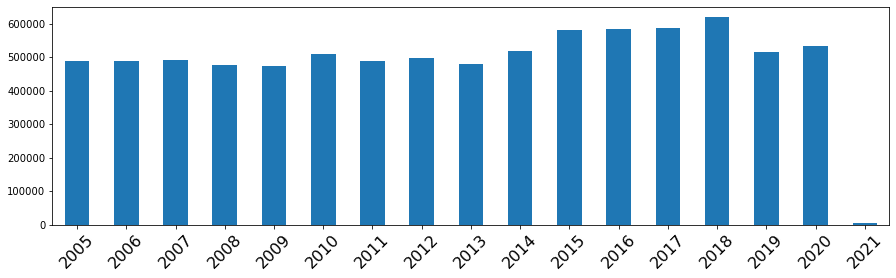

In [13]:
fig=plt.figure(figsize=(15,4))
data['Year_Incident'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45,fontsize=16)

#### Figure text
It seems we can discard 2021. As there is not enough data in this year. 

In [25]:
# export the data with the dates so i can skip the other parts. 
# data.to_csv('Fire_Incident_Dispatch_Data_dates.csv')

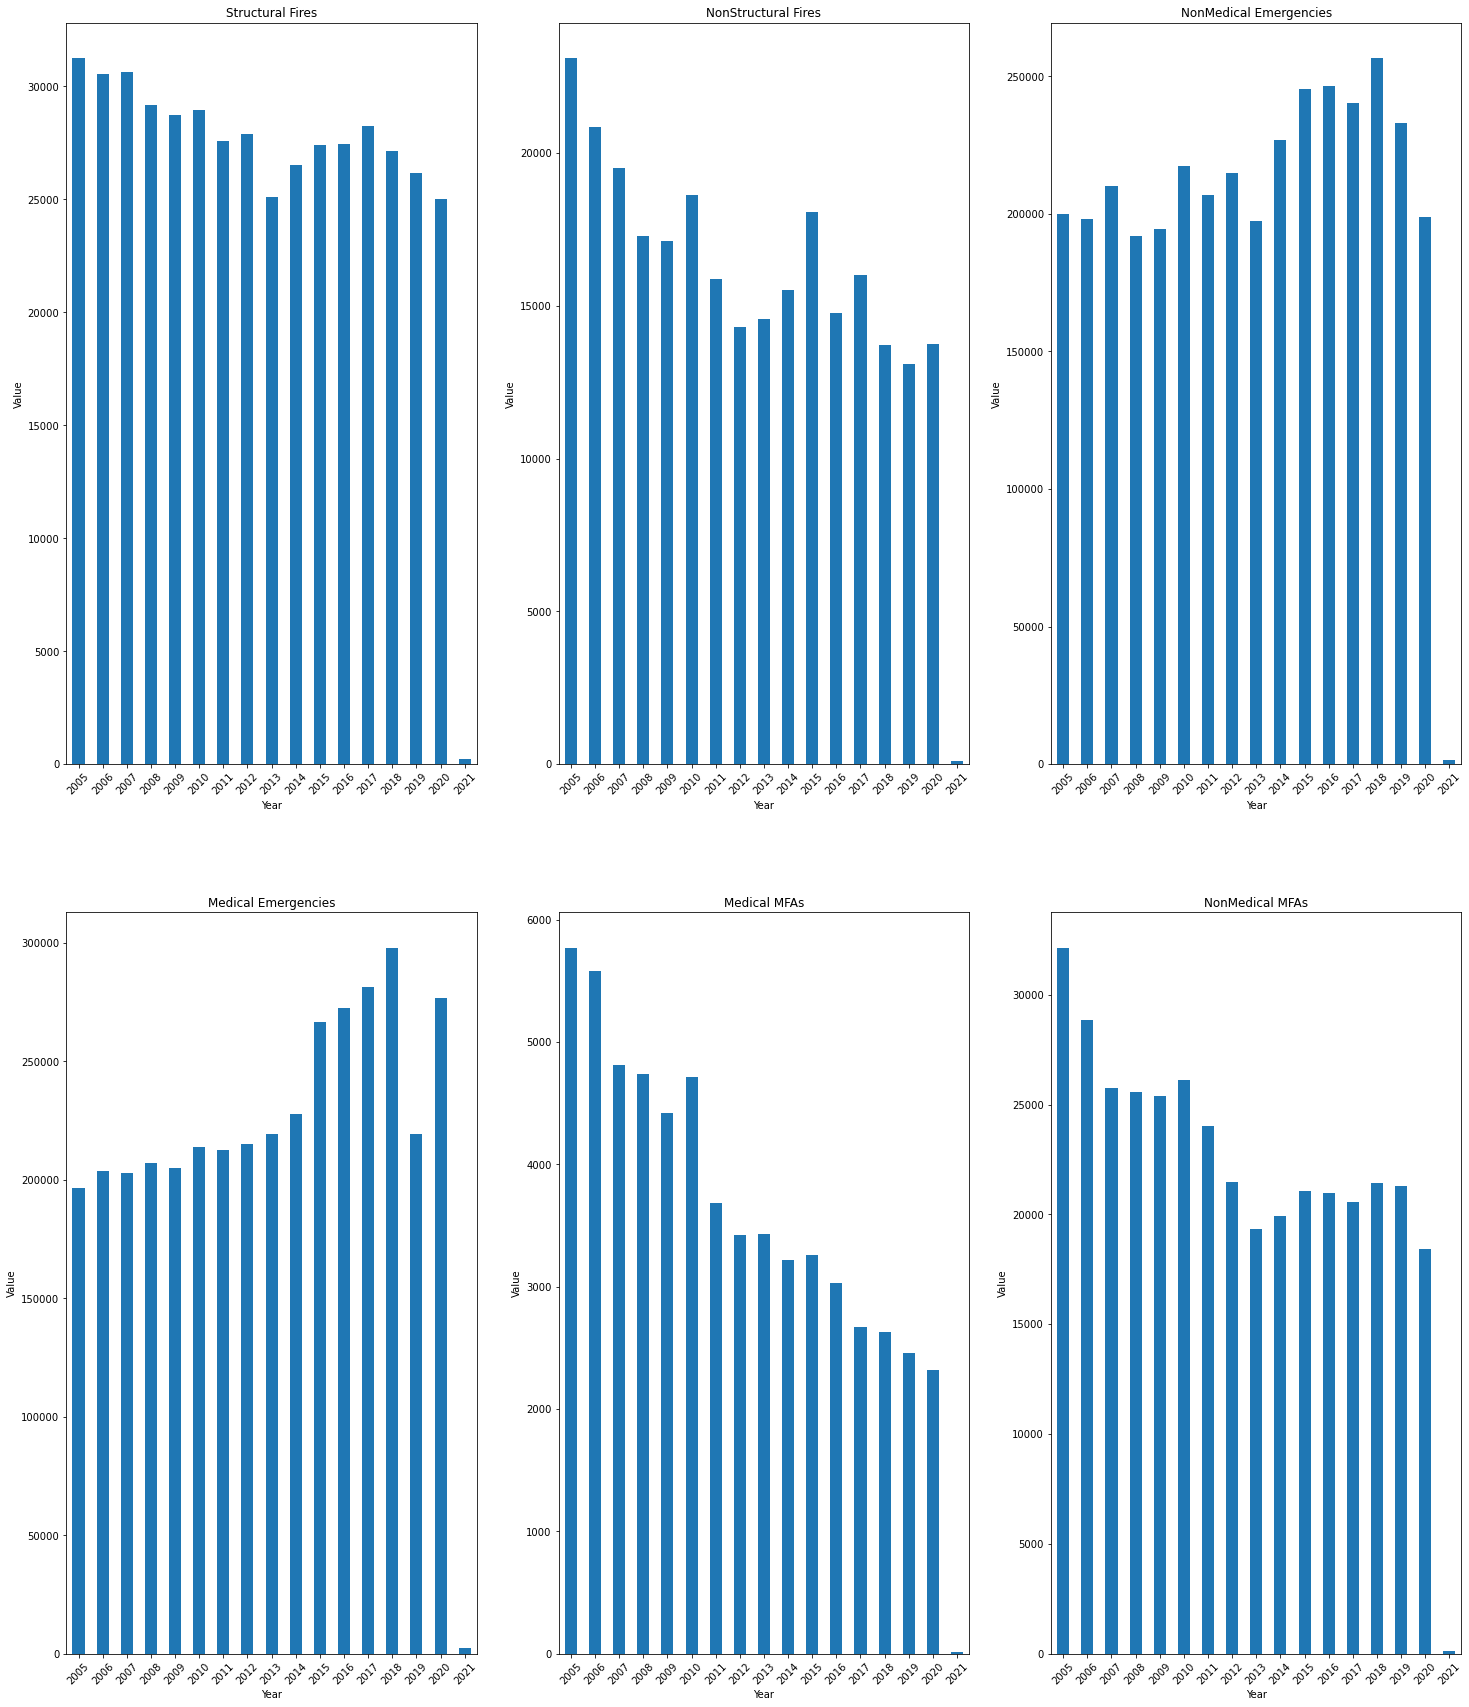

In [15]:
fig=plt.figure(figsize=(25,30))
j = 0
for i in incident_categories:
    ax = plt.subplot(2,3,j+1)
    ax.set_ylabel("Value", fontsize = 10)
    ax.set_xlabel("Year", fontsize = 10)
    data[data.INCIDENT_CLASSIFICATION_GROUP==i].Year_Incident.value_counts().sort_index().plot(kind='bar',title=i)
    j=j+1
    plt.xticks(rotation=45)

## District vs Category

In [16]:
data.ALARM_BOX_BOROUGH.value_counts()

BROOKLYN                    2368006
MANHATTAN                   2219585
BRONX                       1673087
QUEENS                      1661519
RICHMOND / STATEN ISLAND     426278
Name: ALARM_BOX_BOROUGH, dtype: int64

In [17]:
area_type=pd.crosstab(data['ALARM_BOX_BOROUGH'], data['INCIDENT_CLASSIFICATION_GROUP'],
           values=data['INCIDENT_CLASSIFICATION_GROUP'], aggfunc='count').T
area_type = area_type.div(area_type.sum())

In [19]:
category = data['INCIDENT_CLASSIFICATION_GROUP'].value_counts().to_frame()
P_cat=category.divide(data.shape[0])
P_cat

,INCIDENT_CLASSIFICATION_GROUP
Medical Emergencies,0.445776
NonMedical Emergencies,0.416831
Structural Fires,0.053673
NonMedical MFAs,0.044613
NonStructural Fires,0.031900
Medical MFAs,0.007207


### The ratio: 
Now we look at the ratio `P(cateogry|borough)/P(cateogry)`. That ratio is equal to 1 if the incidence occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the incidence occurs _more frequently_ within that district. If it's smaller than one, it means that the incidence is _rarer within the district in question_ than in the city as a whole.

In [20]:
ratio = area_type.div(P_cat.INCIDENT_CLASSIFICATION_GROUP, axis =0)
ratio

ALARM_BOX_BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,RICHMOND / STATEN ISLAND
Medical Emergencies,0.964536,1.008277,1.013060,1.022579,0.937205
Medical MFAs,0.992151,1.063032,0.956525,1.051667,0.705645
NonMedical Emergencies,1.019898,0.982931,1.036308,0.949804,1.023323
NonMedical MFAs,1.202317,0.861571,0.779235,1.167207,1.472687
NonStructural Fires,0.806171,1.108508,0.903213,1.151867,1.070003
Structural Fires,1.088102,1.105928,0.856423,0.966118,0.945428


From here we see that: 


- RICHMOND / STATEN ISLAND has NonMedical MFAs highly frequent within the district. 
- same in Queens
- NonMedical Emergencies is most frequent incidence within Manhattan 
- Brokelyn has NonStructural Fires	as the district's most frequent incidence 
- BRONX has NonMedical MFAs	as the district's most frequent incidence 


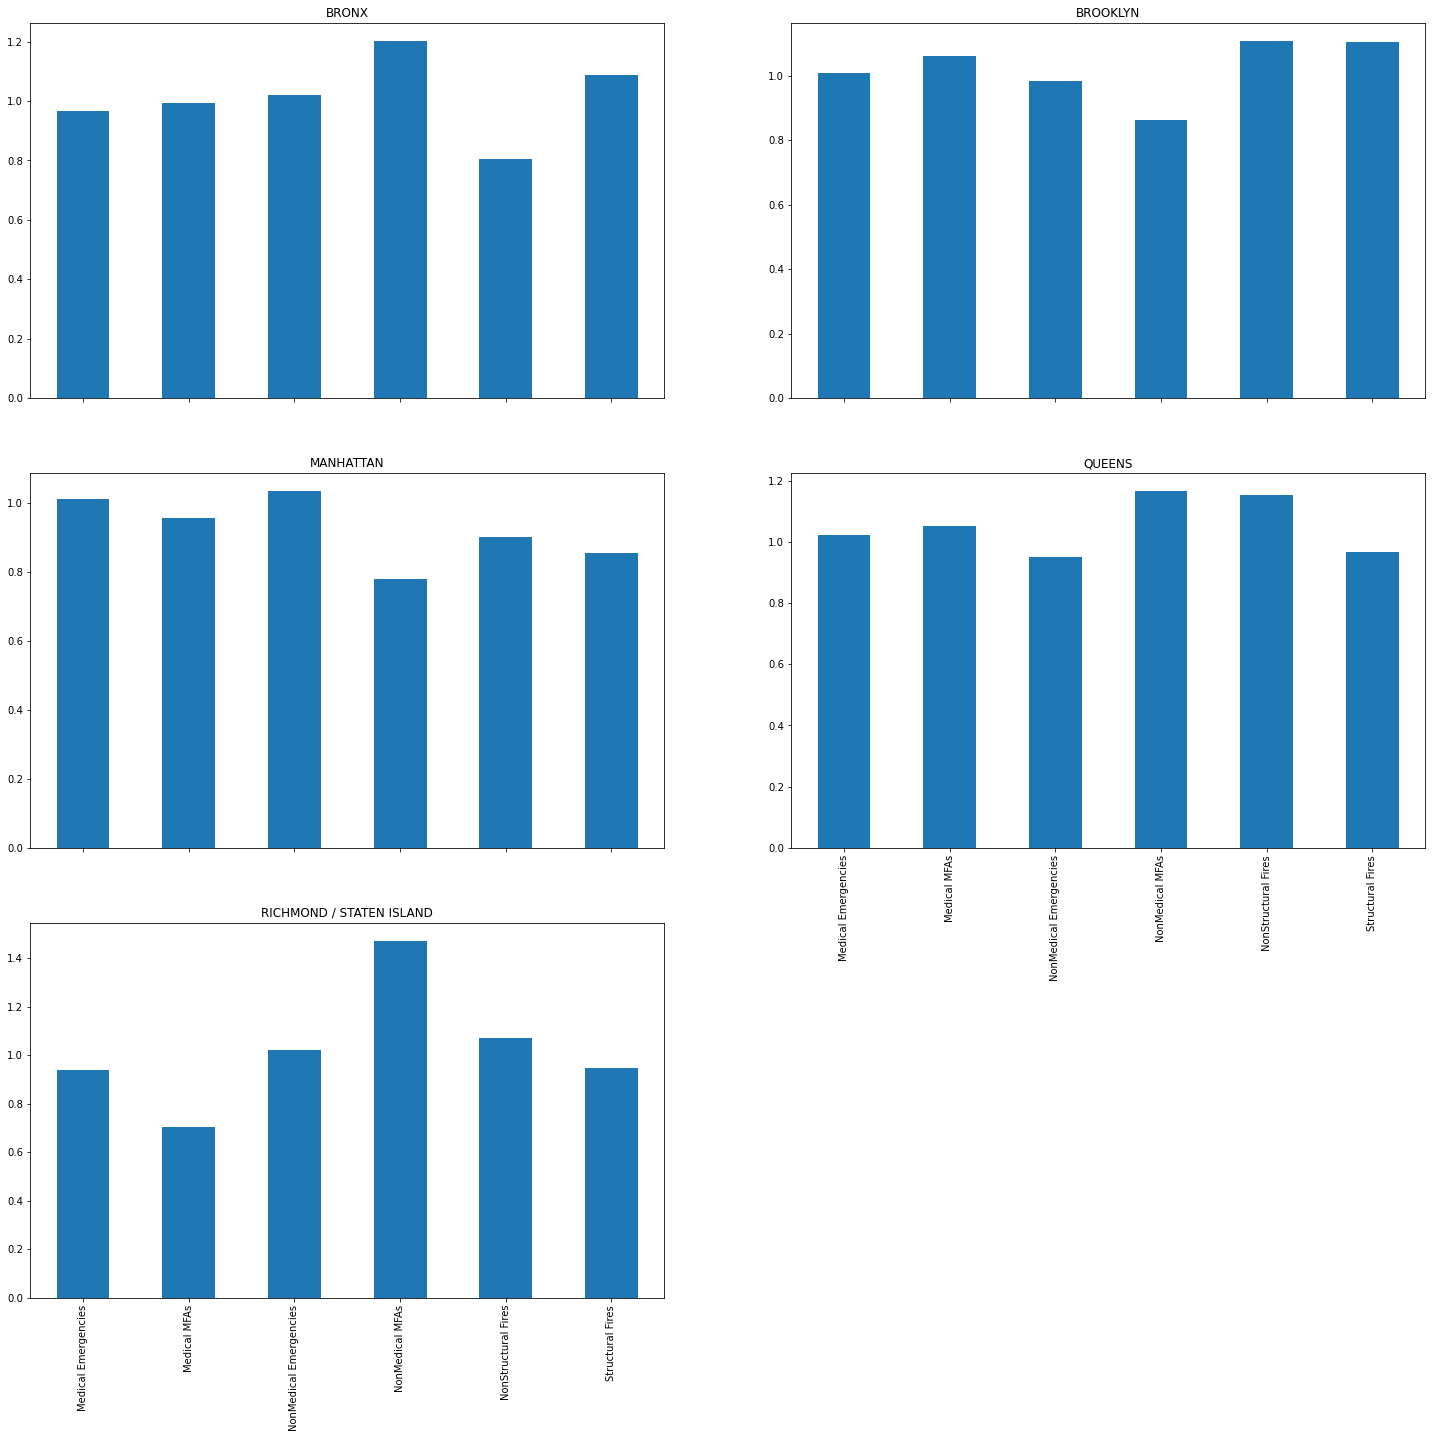

In [21]:
j =1
fig=plt.figure(figsize=(25,40))

for i in ratio: 
    plt.subplot(5,2,j)
    ratio[i].plot(kind='bar',title=i,sharex=True)
    plt.xticks(rotation=90, fontsize = 10)
    j=j+1

#### Hours of the day 

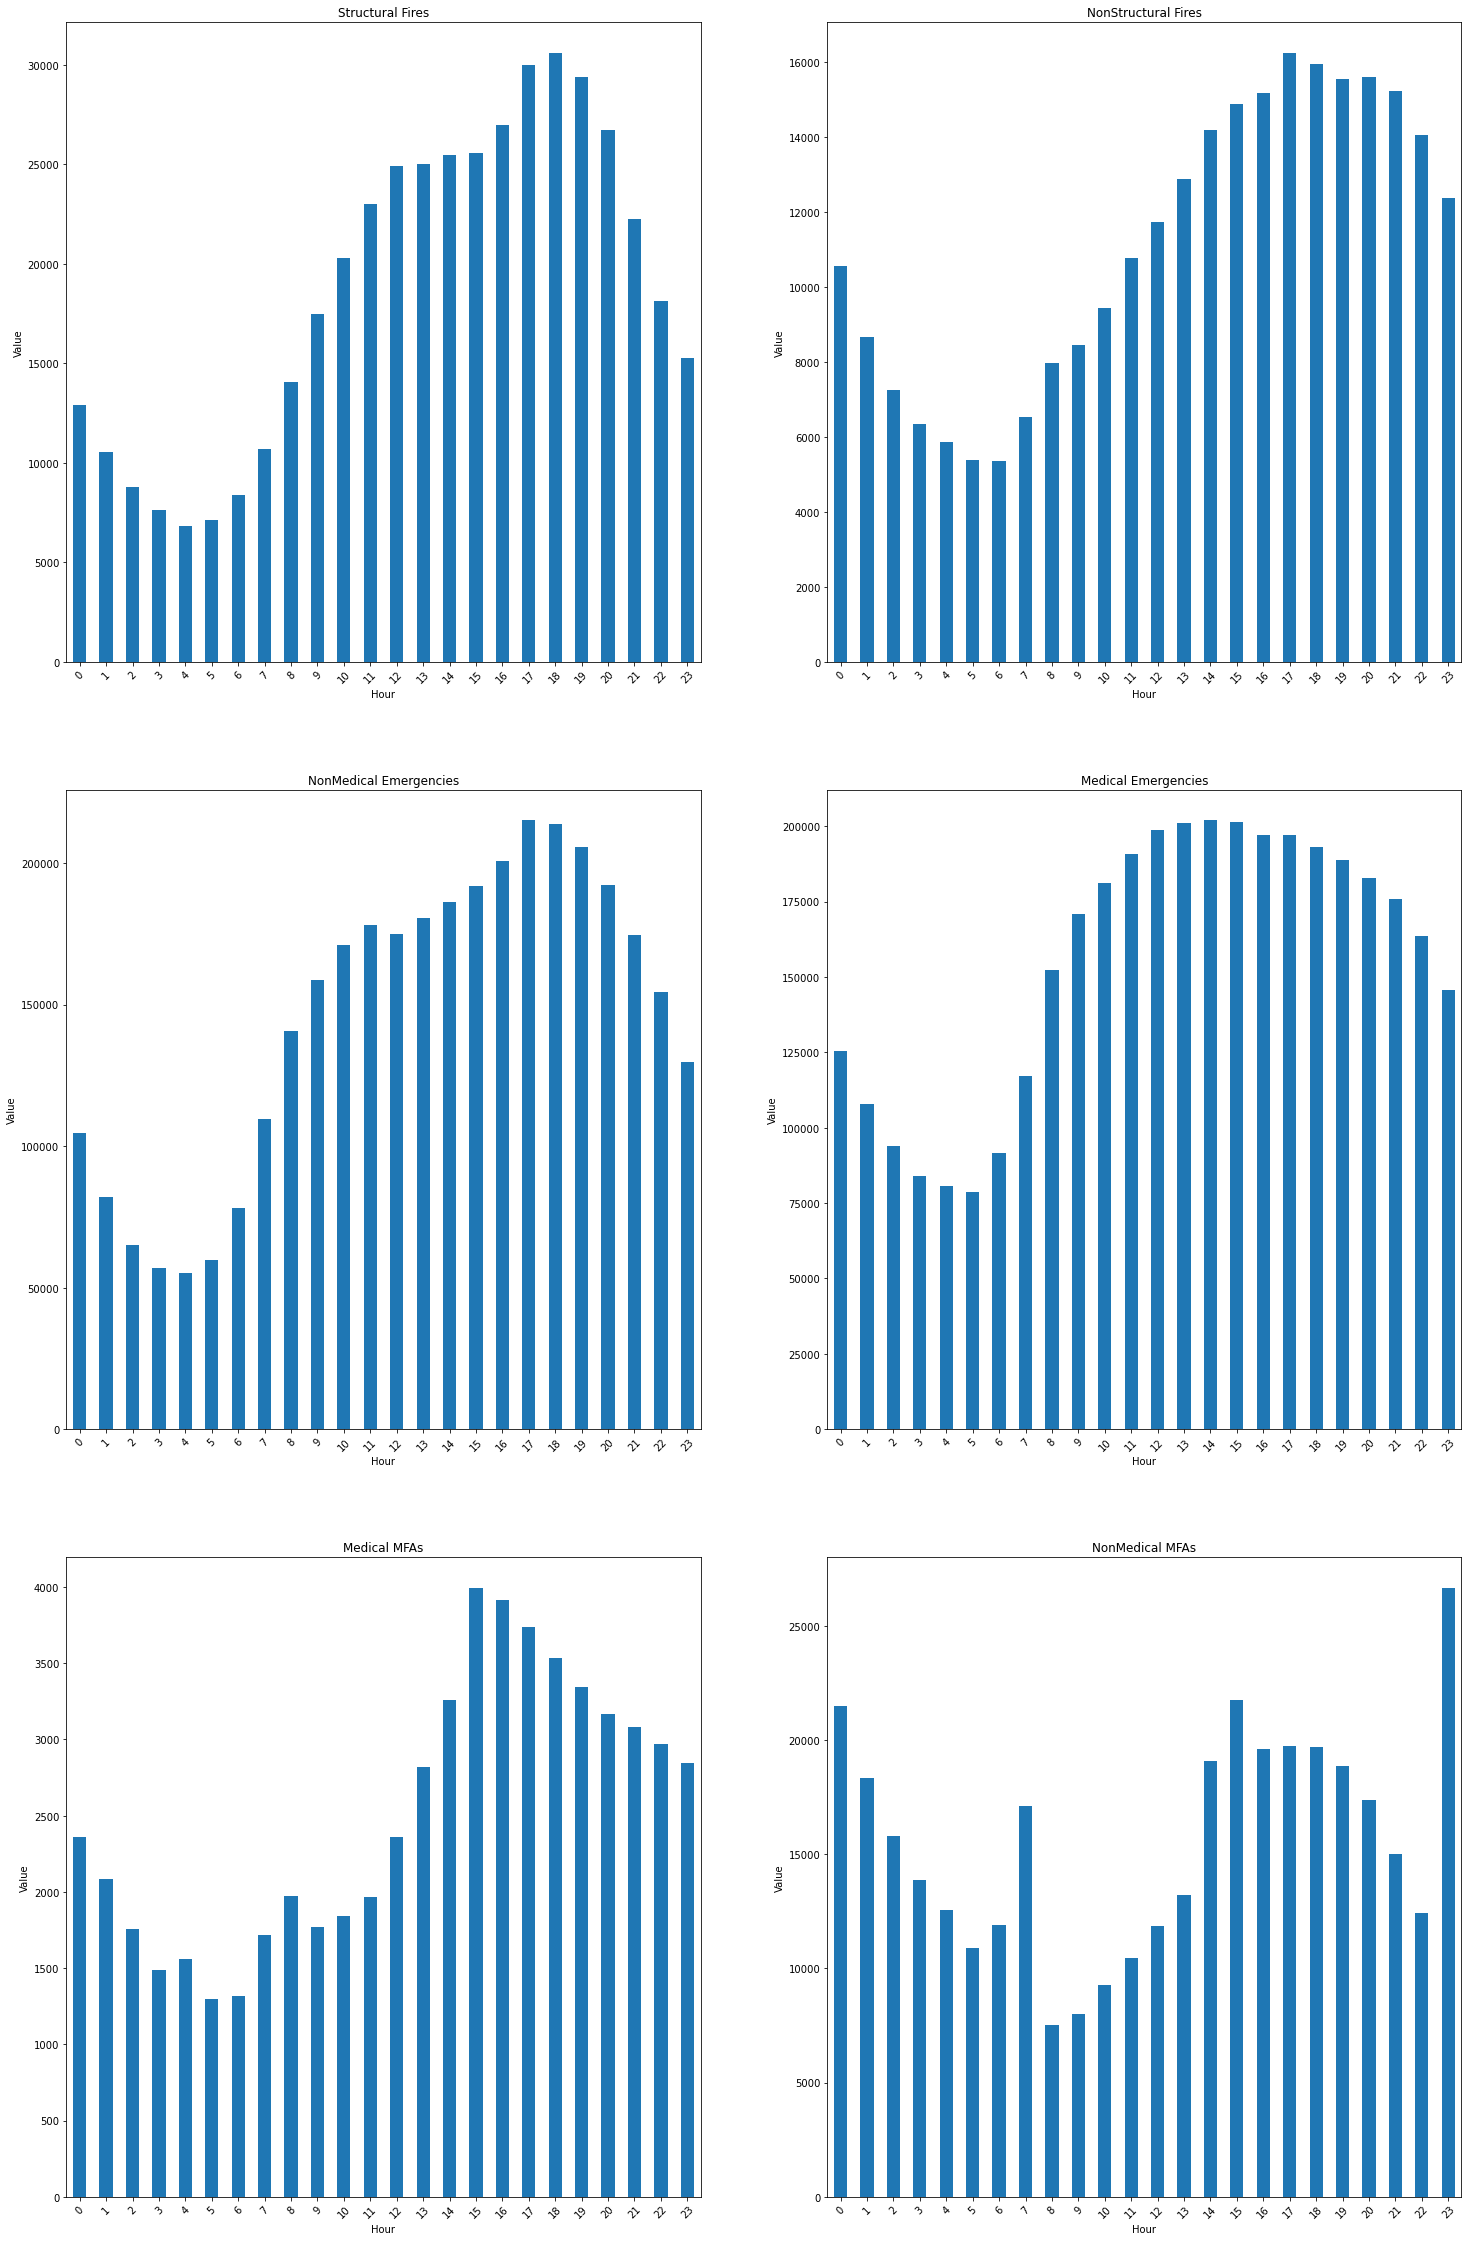

In [22]:
# Plotting the categories by the hour of day 
fig=plt.figure(figsize=(25,40))
j = 0
for i in incident_categories:
    ax = plt.subplot(3,2,j+1)
    ax.set_ylabel("Value")
    ax.set_xlabel("Hour")
    data[data.INCIDENT_CLASSIFICATION_GROUP==i].Hour_Incident.value_counts().sort_index().plot(kind='bar',title=i)
    j=j+1
    plt.xticks(rotation=45)

#### Figure text : 
Most of the incidence types follow same pattern, where the lowest occuring is around 3-5 am in the morning. 


## Response time vs. time of the day 

In [23]:
#FIRST_ASSIGNMENT_DATETIME          object
#FIRST_ACTIVATION_DATETIME          object
#FIRST_ON_SCENE_DATETIME            object
#INCIDENT_CLOSE_DATETIME            object

## Response time vs. cateogory

In [31]:
## boxplot
from datetime import datetime

In [46]:
data = pd.read_csv("Fire_Incident_Dispatch_Data_dates.csv")

In [47]:
data['INCIDENT_DATETIME']= pd.to_datetime(data['INCIDENT_DATETIME'],infer_datetime_format=True)
data['FIRST_ASSIGNMENT_DATETIME']= pd.to_datetime(data['FIRST_ASSIGNMENT_DATETIME'],infer_datetime_format=True)
data['FIRST_ACTIVATION_DATETIME']= pd.to_datetime(data['FIRST_ACTIVATION_DATETIME'],infer_datetime_format=True)
data['FIRST_ON_SCENE_DATETIME']=pd.to_datetime(data['FIRST_ON_SCENE_DATETIME'],infer_datetime_format=True)
data['INCIDENT_CLOSE_DATETIME']=pd.to_datetime(data['INCIDENT_CLOSE_DATETIME'],infer_datetime_format=True)

In [48]:
data[['INCIDENT_DATETIME','FIRST_ASSIGNMENT_DATETIME','FIRST_ACTIVATION_DATETIME','FIRST_ON_SCENE_DATETIME','INCIDENT_CLOSE_DATETIME']]

,INCIDENT_DATETIME,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME
0,2005-01-01 00:00:01,2005-01-01 00:00:41,2005-01-01 00:00:56,2005-01-01 00:06:38,2005-01-01 00:15:56
1,2005-01-01 00:00:03,2005-01-01 00:00:13,2005-01-01 00:01:51,2005-01-01 00:04:23,2005-01-01 00:07:03
2,2005-01-01 00:01:02,2005-01-01 00:01:09,2005-01-01 00:01:25,2005-01-01 00:03:28,2005-01-01 00:13:20
3,2005-01-01 00:01:42,2005-01-01 00:02:34,2005-01-01 00:02:51,2005-01-01 00:07:09,2005-01-01 00:08:27
4,2005-01-01 00:01:45,2005-01-01 00:03:37,2005-01-01 00:04:12,2005-01-01 00:08:16,2005-01-01 00:24:37
...,...,...,...,...,...
8348470,2021-01-03 23:56:04,2021-01-03 23:56:09,2021-01-03 23:56:21,2021-01-03 23:58:50,2021-01-03 23:59:10
8348471,2021-01-03 23:56:12,2021-01-03 23:56:17,2021-01-03 23:56:28,NaT,2021-01-04 00:01:27
8348472,2021-01-03 23:57:13,2021-01-03 23:57:18,2021-01-03 23:57:40,2021-01-04 00:02:02,2021-01-04 00:36:51
8348473,2021-01-03 23:59:39,2021-01-03 23:59:44,2021-01-04 00:00:05,NaT,2021-01-04 00:02:25


In [58]:
data['ProblemSolvingTime']=data['FIRST_ON_SCENE_DATETIME']-data['INCIDENT_DATETIME']

In [84]:
data['TotalTime']=(data['INCIDENT_CLOSE_DATETIME']-data['INCIDENT_DATETIME'])

In [67]:
subdata = data[['INCIDENT_CLASSIFICATION_GROUP','TotalTime','ProblemSolvingTime']]
subdata=subdata.dropna();

In [90]:
subdata.TotalTime=subdata.TotalTime.apply(lambda x: x.total_seconds() if pd.notnull(x) else x)

In [98]:
subdata.ProblemSolvingTime=subdata.ProblemSolvingTime.apply(lambda x: x.total_seconds() if pd.notnull(x) else x)

<AxesSubplot:title={'center':'TotalTime'}, xlabel='[INCIDENT_CLASSIFICATION_GROUP]'>

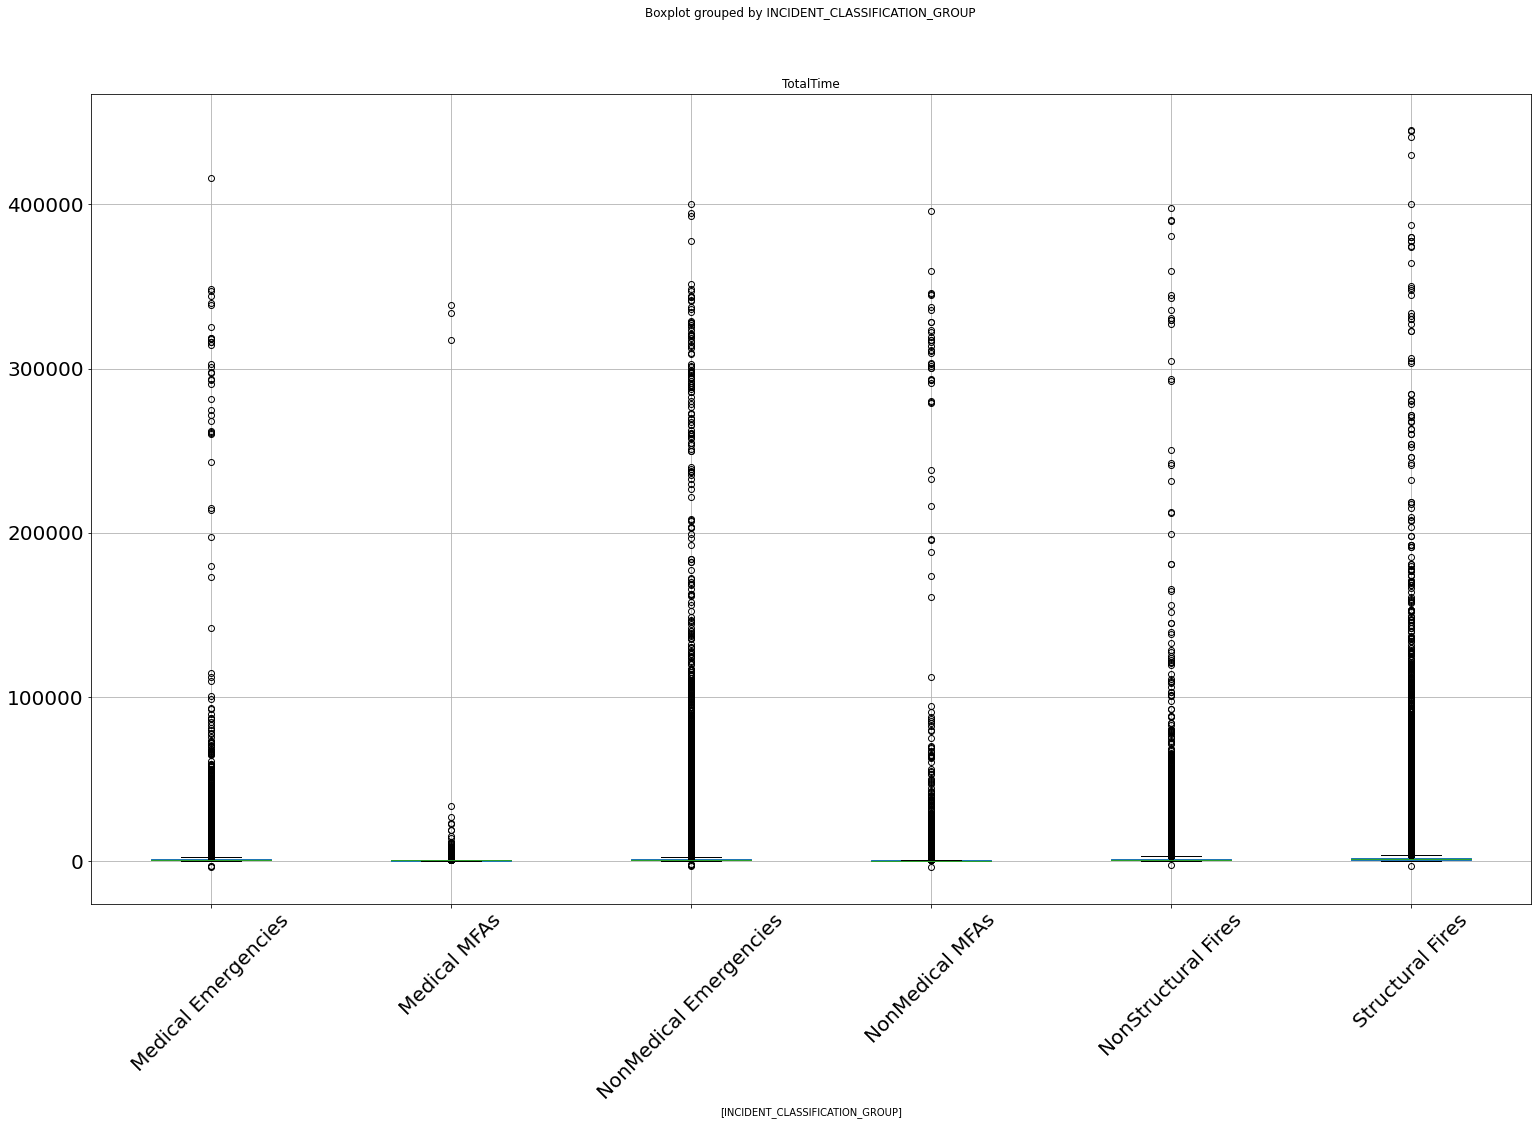

In [97]:
import matplotlib.pyplot as plt

subdata[['INCIDENT_CLASSIFICATION_GROUP','TotalTime']].boxplot(by='INCIDENT_CLASSIFICATION_GROUP'
                                                               ,figsize = (25,15), rot=45, fontsize=20)

<AxesSubplot:title={'center':'ProblemSolvingTime'}, xlabel='[INCIDENT_CLASSIFICATION_GROUP]'>

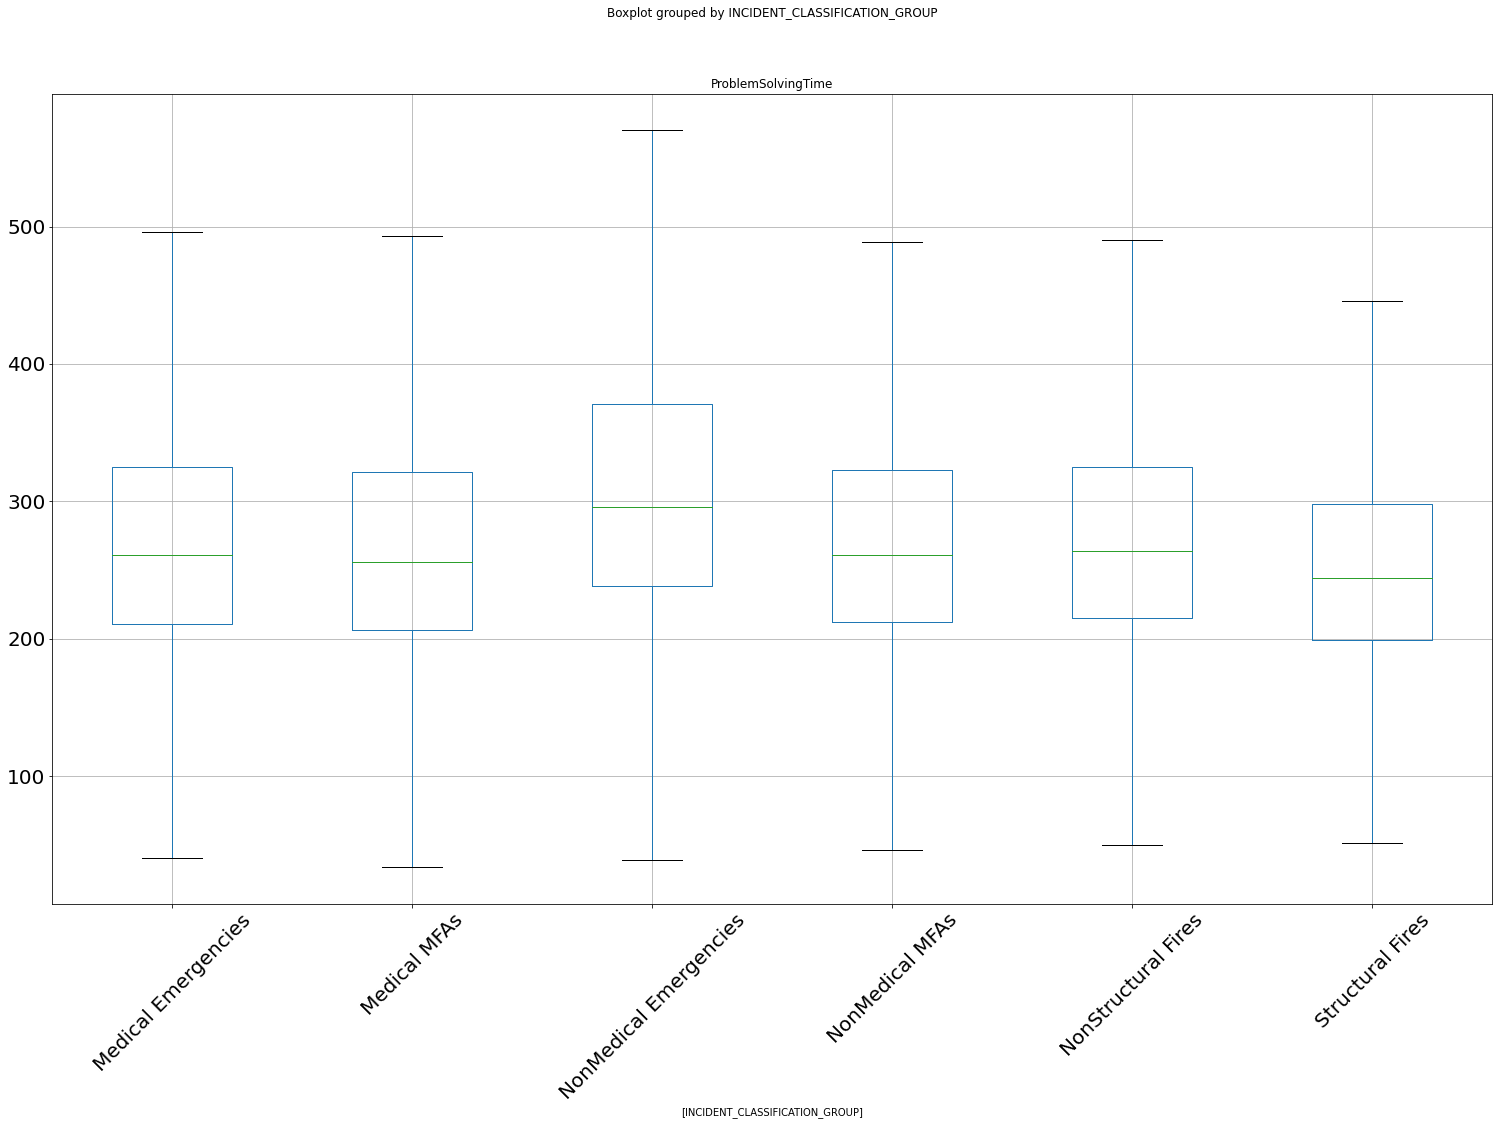

In [111]:
subdata[['INCIDENT_CLASSIFICATION_GROUP','ProblemSolvingTime']].boxplot(by='INCIDENT_CLASSIFICATION_GROUP'
                                                               ,figsize = (25,15), rot=45, fontsize=20, showfliers=False)

In [107]:
medical=subdata[subdata['INCIDENT_CLASSIFICATION_GROUP']=='Medical Emergencies']

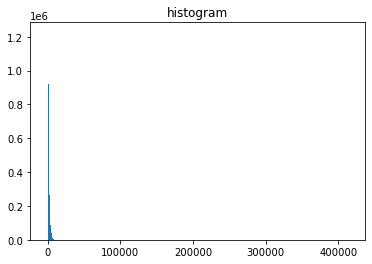

In [110]:
_ = plt.hist(medical.TotalTime, bins=500) 
plt.title("histogram") 
plt.show()

In [109]:
medical.TotalTime

2           738.0
17         1100.0
18          896.0
20          361.0
26         1060.0
            ...  
8348452     568.0
8348453    3390.0
8348460    1664.0
8348461     446.0
8348472    2378.0
Name: TotalTime, Length: 2735428, dtype: float64